# Errores en métodos numéricos

## Errores

Para medir los errores numéricos usamos la nomenclatura de los errores experimentales 


## Definición

Usamos $X_{teo}$ para el valor teórico o verdadero de alguna variable y $X_{aprox}$ para el valor aproximado o numérico. 

El error absoluto está definido por:

$$\err(X_{aprox})=|X_{teo}-X_{aprox}|$$

El error relativo es: 
$$\rel(X_{aprox})=\frac{|X_{teo}-X_{aprox}|}{X_{teo}}$$

El error porcentual es:
$$\por(X_{aprox})=\rel(X_{aprox})(100\%)$$

### Ejemplo:
Sea $X_{teo}=e$ y $X_{aprox}=\tfrac{19}{7}$

$$\err(X_{aprox})=|e - \frac{19}{7}| \approx 0.003996$$

El error relativo es: 
$$\rel(X_{aprox})=\frac{|e - \frac{19}{7}|}{e} \approx 0.00147$$

El error porcentual es:
$$\por(X_{aprox})=(0.00147)(100\%)=1.47\%$$


## Digitos significativos

### Definición:
Decimos que $X_{aprox}$ tiene $m$ digitos significativos cuando el error de $X_A$ cumple con $\err(X_{aprox})\leq tol$ en el digito (m+1) distintos de cero.

### Ejemplo
$$\err(X_{aprox})=e-\frac{19}{7}\approx 0.00\mathbf{3}996$$
se tiene 3 digitos significativos

## Tipos de errores
1. Errores numéricos derivados de la aproximación del método numérico $tol$
2. Errores numéricos de la aritmética discreta de la computadora $X_{aprox}$.
3. Errores en el planteamiento del modelo (¡Vacas esféricas, cuidado!)

## 1. Errores numéricos de la aproximación

Aquí consideramos los términos que despreciamos de las aproximaciones numéricos.

Serie de Taylor
$$e^x \approx 1 + x + \frac{1}{2} x^2$$

Diferenciación
$$ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}$$

Integración numérica
$$ \int_0^1 f(x) dx \approx \frac{1}{n} \sum_{j=1}^n f(\frac{j}{n})$$



## 2. Errores numéricos de la aritmética discreta

Hay que considerar que la computadora tiene limitaciones. Las computadoras no pueden guardar números con decimales infinitos, por lo que no se puede manipular elementos continuos, sino que toda la matemáticas que se hagan con la computadora serán discretas. Tampoco números muy grandes o muy chicos.

In [2]:
x=1.1+2.2
if x==3.3:
    print(x)
else:
    print('x distinto a 3.3')
#¿Por qué no se imprimió x terminando el "if"? Ocurre que por error de redonde 
#1.1+2.2 no es exactamente 3.3, sino que es 3.300000000000003. Por lo cual no 
#se cumple la condición del if. Esto es bastante común en física computacional, 
#por lo que la mejor manera de tratar esto, es introducir un valor 
#epsilón en el código.

epsilon=1e-12
if abs(x-3.3)<epsilon:
    print(x)

x distinto a 3.3
3.3000000000000003


In [2]:
#Primero, veremos el paquete decimal
from decimal import *
getcontext().prec = 6   #te da la precisión que quieres 
print(Decimal(1) / Decimal(7))
print(1/7.)
getcontext().prec = 28
print(Decimal(1) / Decimal(7))

0.142857
0.14285714285714285
0.1428571428571428571428571429


### Ejemplo

Evaluamos
$$f(x) = x(\sqrt{x + 1} - \sqrt{x})$$
con una calculadora de 6 digitos de precisión.

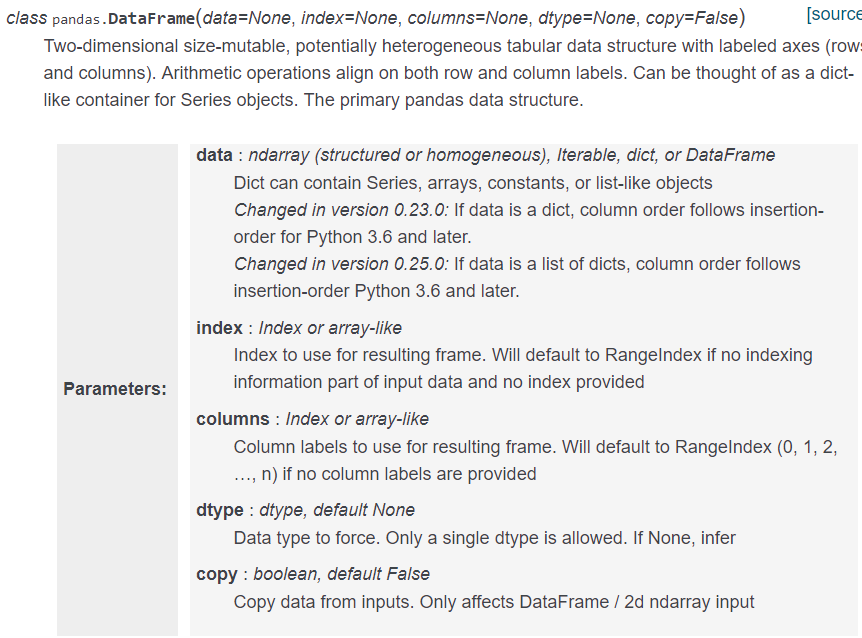

In [3]:
from IPython.display import Image
Image("Errores_1.png")

In [1]:
from decimal import Decimal as D, getcontext as C #C=getcontext()
import pandas as pd
from math import sqrt

C().prec = 6

def f(x):
    return x * (sqrt(x + 1) - sqrt(x))
def fd(x):
    return x * (C().sqrt(x + D(1)) - C().sqrt(x))
residuo = []
idx = []
for i in range(6):
    x = 10**i
    idx.append(x)
    residuo.append([fd(D(x)), f(x)])
cols = ["Aprox", "Real"]
pd.DataFrame(residuo, index=idx, columns=cols)

,Aprox,Real
1,0.41421,0.414214
10,1.54340,1.543471
100,4.9900,4.987562
1000,15.8000,15.807437
10000,50.000,49.998750
100000,100.000,158.113488


En Python, el nivel de precisión estandar es de 16 cifras significativas. Esto significa que los números irracionales serán truncados:

Valor verdadero de Pi: 3.1415956535897932384626...

Valor en Python de Pi: 3.141595653589793

Diferencias:           0.0000000000000002384626

A este error se le llama error de redondeo. 

Entonces, el error numérico de un número, que se denotará $\epsilon$ (epsilon), se define como la cantidad calculada por la computadora menos el valor real (el error absoluto).

En general, si $X_{aprox}$ es una aproximación a cierto número de cifras significativas, digamos 16, entonces el error de redondeo tiene un valor típico de $\frac{X_{aprox}}{10^{16}}$. Usualmente es una buena aproximación considerar el error como una cantidad uniformemente distribuida de un número con la desviación estandar $\sigma=CX_{aprox}$, donde $C\approx 10^{-16}$. Nos referimos a $C$ como una constante de error. 

Comúnmente nos referimos a $\epsilon$ como la desviación estandar ya que sí dieramos un valor exacto de $\epsilon$ sería muy fácil obtener el valor real de x.

Veamos con más cuidado esto de los errores y la precisión de los cálculos:

Sean:
        x=1000000000000000
        y=1000000000000001.234567890123478
Recordando que la computadora sólo guarda 16 cifras significativas, y será truncada. La diferencia entre y-x=1.2, cuando en realidad es 1.234567890123478, lo cual el error porcentual es del 0.23%. Sin embargo, al agregar una cifra decimal a x y y, el error porcentual se incrementa considerablemente.

Veamos en código como se comporta todo.

In [25]:
x=10000000000000000
y=10000000000000001.1234567890123456789
y-x
error=(abs(1-1.1234567890123456789)/1.1234567890123456789)*100
print(error,'%')

10.989010900978144 %


### Ejemplo

Definimos
$$f_1(x) = \frac{1 - \cos(x)}{x^2}, \qquad x \not= 0$$
evaluamos con 10 digitos de precisión

In [4]:
C().prec = 10
from math import cos
import pandas as pd   
def f1(x):
    return (1 - cos(x)) / (x*x)

In [4]:
def f1d(x):
    return +D(D(1) - (+D(cos(x)))) / (D(x*x))

residuo = []
idx = []
for i in range(1, 7):
    x = 10**(-i)
    idx.append(x)
    err=abs(float(f1d(+D(x)))-f1(x))
    residuo.append([f1d(+D(x)), f1(x),err*100])
pd.set_option("precision", C().prec)
cols = ["Aprox", "Real","%"]
pd.DataFrame(residuo, index=idx, columns=cols)

,Aprox,Real,%
0.100000,0.49958347,0.4995834722,0.0000002197
0.010000,0.499996,0.4999958333,0.0000166653
0.001000,0.5,0.4999999583,0.0000041674
0.000100,0.5,0.4999999970,0.0000003039
0.000010,1,0.5000000414,49.9999958630
0.000001,0E+12,0.5000444503,50.0044450291


In [17]:
x = +D(0.001)
+D(cos(x))  #Redondeamos el resultado final regresando a la precisión default

Decimal('0.9999995000')

Es consecuencia de restar dos numeros casí iguales, generan perdidas de significancia. Es difícil de detectar y no siempre es fácil evitarlo.

###  Ejemplo:
Sea $f(x) = \frac{1 - \cos(x)}{x^2}$, usando $$\cos(2\theta) = 2\cos^2(\theta) - 1 = 1 - 2\sin^2(\theta)$$ 

Con $x=2\theta$:
\begin{eqnarray}
f(x) &=& \frac{1 - \cos(x)}{x^2} = \frac{2\sin^2(x/2)}{x^2}\\
     &=& \frac{1}{2} \left[\frac{\sin(x/2)}{x/2}\right]^2
\end{eqnarray}

Comparar varios valores muy pequeños $x\approx 0.001$

In [57]:
from math import sin
def f1a(x):
    return 0.5 * (sin(x/2) / (x/2))**2
def f1da(x):
    return +D(0.5) * (+D(sin(x/2))/ (x/2))**2

#return +D(D(1) - (+D(cos(x)))) / (+D(x*x))
(+D(f1(0.001)), +D(f1a(0.001)), f1d(+D(0.001)), f1da(+D(0.001)))

(Decimal('0.4999999583'),
 Decimal('0.4999999583'),
 Decimal('0.5'),
 Decimal('0.4999999584'))

Notamos que el resultado approximado y el correcto están mucho más cerca, el error casi desapareció.

In [59]:
res = []
idx = []
for i in range(1, 7):
    x = 10**(-i)
    idx.append(x)  
    res.append([f1d(+D(x)), f1da(+D(x)), f1(x), f1a(x)]) 
cols = ["Apr cos", "Apr sen", "Exacto cos", "Exacto sen"] 
pd.set_option("precision", C().prec)
pd.DataFrame(res, index=idx, columns=cols)


,Apr cos,Apr sen,Exacto cos,Exacto sen
0.100000,0.49958347,0.4995834722,0.4995834722,0.4995834722
0.010000,0.499996,0.4999958334,0.4999958333,0.4999958333
0.001000,0.5,0.4999999584,0.4999999583,0.4999999583
0.000100,0.5,0.4999999996,0.4999999970,0.4999999996
0.000010,1,0.500,0.5000000414,0.5000000000
0.000001,0E+12,0.500,0.5000444503,0.5000000000


### Ejemplo (más sutil)

Evaluamos $e^{-5}$ usando la aproximación de Taylor
$$e^{-5} \approx 1 + \frac{(-5)}{1!} + \frac{(-5)^2}{2!} + \frac{(-5)^3}{3!} + \dots + \frac{(-5)^n}{n!}$$

Usando $n = 25$, el error es de 
$$\epsilon =  \left| \frac{(-5)^{26}}{26!} e^c \right| \le 10^{-8}$$
Lo valuamos con 4 digitos de precisión.

In [6]:
from math import exp, factorial
C().prec = 4
res = +D(1)  #D = decimal
for i in range(1, 26):
    res = res + (+D((-5)**i/factorial(i))) #se le van sumando los terminos de la serie de taylor 

(res, +D(exp(-5)), +D(exp(-5)) - res)   ##(unsando Decimal, valor real,  valor conserie de taylor)

(Decimal('0.009985'), Decimal('0.006738'), Decimal('-0.003247'))

Notamos la diferencia grande entre el resultado correcto 0.006738 y la aproximación 0.009985, con un error de -0.003247.

Para entender el efecto analizamos el termino
$$\frac{(-5)^3}{3!} = - \frac{125}{6} \approx -20.83$$

In [66]:
term3 = (-5)**3 / factorial(3)
aprox = +D(term3)
error = +D(term3 - float(aprox))
(term3, aprox, error)

(-20.833333333333332, Decimal('-20.83'), Decimal('-0.003333'))

In [42]:
term4 = (-5)**4 / factorial(4)
aprox = +D(term4)
error = +D(term4 - float(aprox))
(term4, aprox, error)

(26.041666666666668, Decimal('26.04'), Decimal('0.001667'))

In [44]:
term5 = (-5)**5 / factorial(5)
aprox5 = +D(term5)
error = +D(term5 - float(aprox5))
(term5, aprox, error)

(-26.041666666666668, Decimal('-26.04'), Decimal('-0.001667'))

In [33]:
term6 = (-5)**6 / factorial(6)
aprox = +D(term6)
error = +D(term6 - float(aprox))
(term6, aprox, error)

(21.70138888888889, Decimal('21.70'), Decimal('0.001389'))

In [34]:
term7 = (-5)**7 / factorial(7)
aprox = +D(term7)
error = +D(term7 - float(aprox))
(term7, aprox, error)

(-15.500992063492063, Decimal('-15.50'), Decimal('-0.0009921'))

In [35]:
term2 = (-5)**2 / factorial(2)
aprox = +D(term2)
error = +D(term2 - float(aprox))
(term2, aprox, error)

(12.5, Decimal('12.5'), Decimal('0'))

In [36]:
term1 = (-5)**1 / factorial(1)
aprox = +D(term1)
error = +D(term1 - float(aprox))
(term1, aprox, error)

(-5.0, Decimal('-5'), Decimal('0'))

In [37]:
term0 = (-5)**0 / factorial(0)
aprox = +D(term0)
error = +D(term0 - float(aprox))
(term0, aprox, error)

(1.0, Decimal('1'), Decimal('0'))

In [63]:
term8 = (-5)**8 / factorial(8)
aprox = +D(term8)
error = +D(term8 - float(aprox))
(term, aprox, error)

(-15.500992063492063, Decimal('9.688'), Decimal('0.0001200'))

In [64]:
e= term0 + term1 + term2 +term3 + term4+ term5+ term6 + term7 +term8
print(e)

3.5551835317460334


In [62]:
term0, term1, term2, term3, term4, term5, term6, term7 

(1.0,
 -5.0,
 12.5,
 -20.833333333333332,
 26.041666666666668,
 -26.041666666666668,
 21.70138888888889,
 -15.500992063492063)

#### Moraleja: No siempre es bueno usar la fuerza bruta, entre más términos se tienen más error acumulado de va sumando y altera más mi resultado, es preferible en algunos casos ser más "mañosos" 

Veamos que el error de -0.003333 es del mismo orden de magnitud que el resultado fínal de 0.006738.

**Sumar (restar) terminos con un resultado mucho menor que los terminos individuales resulta en una perdida importante de significancia.**

## Underflow y Overflow
Python permite tener números lo suficientemente grandes o chicos, alrededor de 16 cifras significativas. Por ejemplo, el valor flotante más largo que se puede ingresar es $10^{308}$. Este número suele ser suficiente para hacer física computacional, pero en ocasiones, no es suficiente. Si nos pasamos de este número, ocurre que la variable se sobresatura "overflowed" y Python nos regresará un valor "inf", llevando a errores numéricos graves o a que el código no pueda ser ejecutado.

(Nota: Para números muy pequeños, como $2^{-1022}$)

In [75]:
def factorial_entera(n):
    multiplicacion=1 #Funcion entera
    for i in range(1,n):
        multiplicacion*=i
    return multiplicacion
def factorial_flotante(n):
    multiplicacion=1.0 #Funcion flotante
    for i in range(1,n):
        multiplicacion*=i
    return multiplicacion

print('*El factorial entero es :\n',factorial_entera(200))
print('**El factorial flotante es :\n',factorial_flotante(200))

*El factorial entero es :
 3943289336823952517761816069660925311475679888435866316473712666221797249817016714601521420059923119520886060694598194151288213951213185525309633124764149655567314286353816586186984944719612228107258321201270166459320656137141474266387621212037869516201606287027897843301130159520851620311758504293980894611113948118519486873600000000000000000000000000000000000000000000000
**El factorial flotante es :
 inf


### Ejercicio:
Considera dos números
$$x=1$$
$$y=1+10^{-14}\sqrt(2)$$

Haz un programita en Python que calcule directamente 
$$\sqrt(2)$$ 
y 
$$\sqrt(2)=10^{14}(y-x).$$
¿Qué valor te da? ¿Cuál es el valor porcentual?

In [1]:
from math import * 
def raizcuadrada(n):
    r = sqrt(n)
    return r

r =raizcuadrada(2)
print(r)


x=1
y=1+(sqrt(2)*(1*1e-14))

raiz2=y-x
print(raiz2)

error = D(r - float(raiz2))
print(error)


1.4142135623730951
1.4210854715202004e-14


NameError: name 'D' is not defined

## Propagación en operaciones aritmeticas

Usamos $\otimes$ para anotar una operación aritmetica ($+$, $-$, $*$ y $/$). Utilizamos $\boxtimes$ para la versión aproximada, realizada en la computadora, con redonedo o truncación. Tenemos $X_{aprox} \approx X_{teo}$ y $y_{aprox} \approx y_{teo}$ y queremos calcular $X_{teo} \otimes y_{teo}$, pero lo que obtenemos es $X_{aprox} \boxtimes y_A$.

### Ejemplo: Error de propagación en la multiplicación
En este caso $\otimes = *$ y evaluamos el error relativo para $X_{aprox}  y_{aprox}$:
$$\rel(X_{aprox}  y_{aprox}) = \frac{X_{teo}y_{teo} - X_{aprox}  y_{aprox}}{x_{teo} y_{teo}}$$
Con
$$x_{teo} = X_{aprox}  + \xi, \qquad y_{teo} = X_{aprox}  + \eta$$
obtenemos
\begin{align}
\rel(X_{aprox} y_{aprox}) &= \frac{x_{teo} y_{teo} - X_{aprox}  y_{aprox}}{x_{teo} y_{teo}}\\
  &= \frac{x_{teo} y_{teo} - (x_{teo} - \xi) (x_{teo} - \eta)}{x_{teo} y_T}\\
  &= \frac{x_{teo} \eta + y_{teo} \xi - \xi\eta}{x_{teo} y_{teo}}\\
  &= \frac{\xi}{x_{teo}} + \frac{\eta}{y_{teo}} - \frac{\xi}{x_{teo}}\cdot\frac{\eta}{y_{teo}}\\
  &= \rel(X_{aprox}) + \rel(y_{aprox}) - \rel(X_{aprox})\rel(y_{aprox})\\
\end{align}

Normalmente tenemos
$$
  |\rel(x_A)|,\ |\rel(y_A)| \ll 1
$$
que nos permita aproximar 
\begin{align}
rel(x_A y_A) &= \rel(x_A) + \rel(y_A) - \rel(x_A)\rel(y_A)\\
  &\approx \rel(x_A) + \rel(y_A)
\end{align}
Entonces podemos concluir que errores pequeños en $x_A$ y $y_A$ producen un error pequeño en $x_A y_A$, con la posibilidad de una cancelación en el caso de signos opuestos de los errores.

Para la división obtenemos
$$\rel(\frac{x_A}{y_A}) = \rel(x_A) - \rel(y_A)$$
mientras $|\rel(y_A)| \ll 1$

## Ruido en la evaluación de funciones

\begin{eqnarray}
f(x) &=& (x - 1)^3\\
     &=& -1 + 3x - 3x^2 + x^3\\
\end{eqnarray}
con cero para $x = 1$. Graficando detectamos ruido en la evaluación.


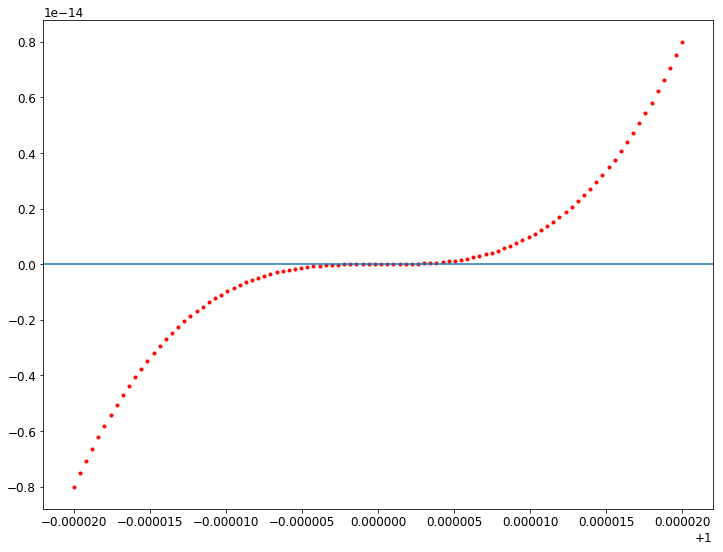

In [24]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9] # ancho, alto de figuras
plt.rcParams["font.size"] = 12
def fr(x):
    return -1 + 3*x - 3*x**2 + x**3

def frf(x):
    return (x - 1)**3 # evita restas problematicas

x = np.linspace(0.99998, 1.00002, 100)
#x = np.linspace(0.5, 1.5, 100)
#y = fr(x)    # con restas de terminos del mismo orden
y = frf(x)   # Evitando restas...

plt.plot(x, y, 'r.')
plt.axhline();